# **Holiday Package Prediction**

## **1. Problem Statement**

* `Trips & Travel.Com` company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages.
* Currently, there are 5 types of packages the company is offering - `Basic, Standard, Deluxe, Super Deluxe, King`.
* Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
* The company is now planning to launch a new product i.e. `Wellness Tourism Package`. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
* However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

## **2. Data Collection**

* The Dataset is collected from :- https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
* The Data consists of `4888 samples` with `20 features`


In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Travel.csv')
df[:5]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [4]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

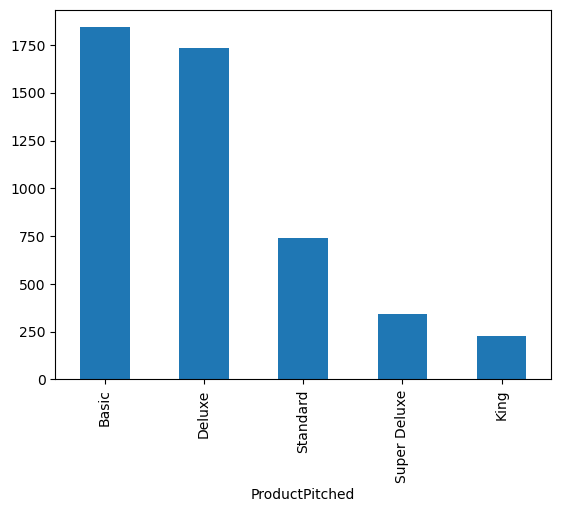

In [6]:
df['ProductPitched'].value_counts().plot(kind='bar')
plt.show()

## 3. Data Cleaning

1. Handling `Missing Values`
2. Handling `Duplicates`
3. Check `Datatypes`
4. Understand the Dataset

In [7]:
# Cheching Missing Values
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
# check all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [9]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [10]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [11]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [12]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [13]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [14]:
# Impute Missing Values
features_with_na = [features for features in df.columns if df[features].isnull().sum()>0]

In [15]:
for feature in features_with_na:
    print(f'`{feature}` ------->  {np.round(df[feature].isnull().mean()*100,2)} % missing values')

`Age` ------->  4.62 % missing values
`TypeofContact` ------->  0.51 % missing values
`DurationOfPitch` ------->  5.14 % missing values
`NumberOfFollowups` ------->  0.92 % missing values
`PreferredPropertyStar` ------->  0.53 % missing values
`NumberOfTrips` ------->  2.86 % missing values
`NumberOfChildrenVisiting` ------->  1.35 % missing values
`MonthlyIncome` ------->  4.77 % missing values


In [16]:
# df[features_with_na].select_dtypes(exclude='object').describe()
df[features_with_na].describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### **3.1. Imputing Missing Values**
1. `Age` --> Median value
2. `TypeofContact` --> Mode value
3. `DurationOfPitch` --> Median value
4. `NumberOfFollowups` --> Mode value
5. `PreferredPropertyStar` --> Mode Value
6. `NumberOfTrip` --> Median Value
7. `NumberOfChildrenVisiting` --> Mode value
8. `MonthlyIncome` --> Median Value

In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0],inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].median(),inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

In [18]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [19]:
df.drop('CustomerID',axis=1,inplace=True)

### 4. Feature Engineering

**Feature Extraction**

In [20]:
# Create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [21]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Unmarried,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Unmarried,3.0,0,5,0,Executive,20289.0,5.0


In [22]:
# Get all Numeric Features
num_features = [feature for feature in df.columns if  df[feature].dtype !='O']
len(num_features),num_features

(12,
 ['ProdTaken',
  'Age',
  'CityTier',
  'DurationOfPitch',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfTrips',
  'Passport',
  'PitchSatisfactionScore',
  'OwnCar',
  'MonthlyIncome',
  'TotalVisiting'])

In [23]:
# Get all Categorical Features
cat_features = [feature for feature in df.columns if  df[feature].dtype =='O']
len(cat_features),cat_features

(6,
 ['TypeofContact',
  'Occupation',
  'Gender',
  'ProductPitched',
  'MaritalStatus',
  'Designation'])

In [24]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
len(discrete_features)

9

In [25]:
continuous_feature = [feature for feature in num_features if feature not in discrete_features]
len(continuous_feature)

3

In [26]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


## 5. Train test split

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [28]:
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [29]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

In [30]:
cat_features

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [31]:
num_features

Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')

In [32]:
# create Column transformer with 3 types of transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('num_transformer',num_transformer,num_features),
        ('cat_transformer',cat_transformer,cat_features)
    ]
)
# preprocessor = ColumnTransformer(
#     [
#         ('num_transformer',StandardScaler(),num_features),
#         ('cat_transformer',OneHotEncoder(drop='first'),cat_features)
#     ]
# )


In [33]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score


# 6. Moddel Training (RandomForestClassifier)



In [35]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest ':RandomForestClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(n_estimators=80,algorithm='SAMME')
    # {'n_estimators': 80, 'algorithm': 'SAMME'}
}
print("------------------------------------------------------------------------------------")
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    print(list(models.keys())[i])
    print("-----------------")
    print(f"Accuracy : {accuracy_score(y_test,y_preds)}")
    print(f"Precision : {precision_score(y_test,y_preds)}")
    print(f"Recall : {recall_score(y_test,y_preds)}")
    print(f"F1  : {f1_score(y_test,y_preds)}")
    print(f"ROC AUC Score  : {roc_auc_score(y_test,y_preds)}")
    # print(f"Confusion Matrix  : \n{confusion_matrix(y_test,y_preds)}\n")
    # print(f"Classification Report  : \n{classification_report(y_test,y_preds)}")
    print("-------------------------------------------X-----------------------------------------")



------------------------------------------------------------------------------------
Logistic Regression
-----------------
Accuracy : 0.83640081799591
Precision : 0.691358024691358
Recall : 0.2931937172774869
F1  : 0.4117647058823529
ROC AUC Score  : 0.630713758257549
-------------------------------------------X-----------------------------------------
Naive Bayes
-----------------
Accuracy : 0.6942740286298569
Precision : 0.3516483516483517
Recall : 0.6701570680628273
F1  : 0.46126126126126127
ROC AUC Score  : 0.6851420664329384
-------------------------------------------X-----------------------------------------
Decision Tree
-----------------
Accuracy : 0.9141104294478528
Precision : 0.7891891891891892
Recall : 0.7643979057591623
F1  : 0.776595744680851
ROC AUC Score  : 0.8574213162849179
-------------------------------------------X-----------------------------------------
Random Forest 
-----------------
Accuracy : 0.9233128834355828
Precision : 0.9603174603174603
Recall : 0.633507

## 7. Hyperparameter tuning Random forest model

In [38]:
rf_params = {
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators': [100,200,500,1000],
}
# adaboost_params ={
#         'n_estimators' : [50, 60, 70, 80, 90],
#         'algorithm' : ['SAMME', 'SAMME.R'],
        
# }
gradient_boost_params = {
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error', 'mse'],
    'n_estimators': [100,200,500],
    'min_samples_split':[2,8,15,20],
    'max_depth': [5,8,15,None,10],
}

In [39]:
random_cv_models = [
    ('Random Forest',RandomForestClassifier(),rf_params),
    # ("Adaboost", AdaBoostClassifier(),adaboost_params),
    ("Gradient Boosting", GradientBoostingClassifier(),gradient_boost_params),
    
]

In [40]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in random_cv_models:
    random = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=50,
        cv=3,
        verbose=2,
        n_jobs=-1,
    )
    random.fit(X_train,y_train)
    model_param[name] = random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [41]:
for model_name in model_param:
    print(f"--------Best params for {model_name} Model-----------")
    print(model_param[model_name])

--------Best params for Random Forest Model-----------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}
--------Best params for Gradient Boosting Model-----------
{'n_estimators': 500, 'min_samples_split': 20, 'max_depth': 15, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [42]:
# Retrain models with best params
models = {
    'Random Forest ':RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=7,max_depth=15),
    'Gradient Boost' : GradientBoostingClassifier(n_estimators=500,min_samples_split=20,max_depth=15,loss='exponential',criterion='friedman_mse'),
}
print("------------------------------------------------------------------------------------")
for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    print(list(models.keys())[i])
    print("-----------------")
    print(f"Accuracy : {accuracy_score(y_test,y_preds)}")
    print(f"Precision : {precision_score(y_test,y_preds)}")
    print(f"Recall : {recall_score(y_test,y_preds)}")
    print(f"F1  : {f1_score(y_test,y_preds)}")
    print(f"ROC AUC Score  : {roc_auc_score(y_test,y_preds)}")
    # print(f"Confusion Matrix  : \n{confusion_matrix(y_test,y_preds)}\n")
    # print(f"Classification Report  : \n{classification_report(y_test,y_preds)}")
    print("-------------------------------------------X-----------------------------------------")



------------------------------------------------------------------------------------
Random Forest 
-----------------
Accuracy : 0.9274028629856851
Precision : 0.9761904761904762
Recall : 0.643979057591623
F1  : 0.7760252365930599
ROC AUC Score  : 0.8200835567500682
-------------------------------------------X-----------------------------------------
Gradient Boost
-----------------
Accuracy : 0.9580777096114519
Precision : 0.9629629629629629
Recall : 0.8167539267015707
F1  : 0.8838526912181303
ROC AUC Score  : 0.9045650192592987
-------------------------------------------X-----------------------------------------


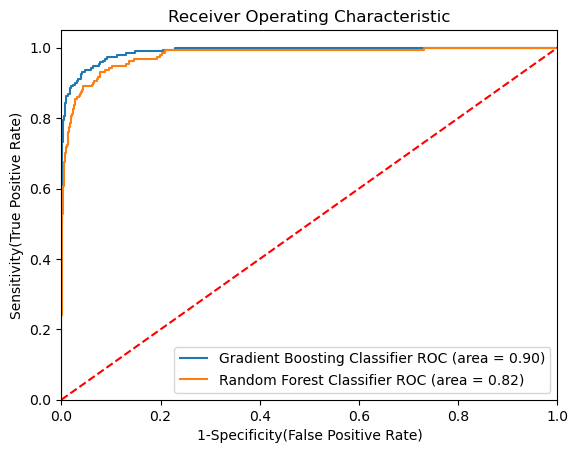

In [43]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
    'label': 'Gradient Boosting Classifier',
    'model':  GradientBoostingClassifier(n_estimators=500,min_samples_split=20,max_depth=15,loss='exponential',criterion='friedman_mse'),
    'auc':  0.9045650192592987
    },
    {
    'label': 'Random Forest Classifier',
    'model':  RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=7,max_depth=15),
    'auc':  0.8200835567500682
    },
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 